In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
adv_rag = pd.read_csv('../../data/MainDataset/results/Official/Advanced_RAG.csv')
naive_rag = pd.read_csv('../../data/MainDataset/results/Official/naive_RAG.csv')
no_rag = pd.read_csv('../../data/MainDataset/results/Official/llama-8b-8192.csv')
gemma = pd.read_csv('../../data/MainDataset/results/Official/gemma2-9b-it.csv')
gpt = pd.read_csv('../../data/MainDataset/results/Official/GPT4oMini.csv')
mixtral = pd.read_csv('../../data/MainDataset/results/Official/mixtral-8x7b.csv')

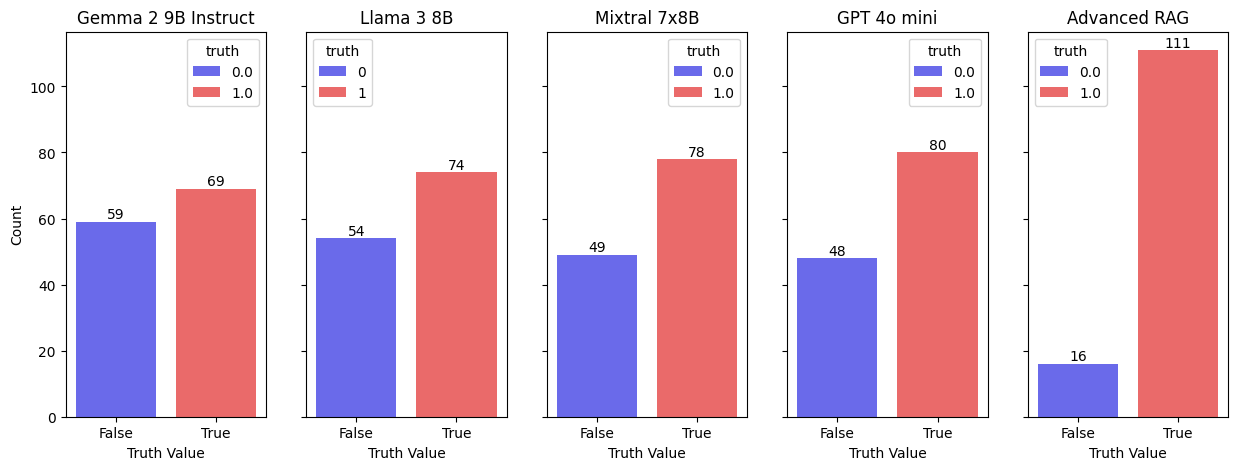

In [3]:

fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True) 
plt.title('Comparison of Methods Truth Counts')

sns.countplot(data=gemma, x='truth', hue='truth', palette='seismic', ax=axes[0])
axes[0].bar_label(axes[0].containers[0])
axes[0].bar_label(axes[0].containers[1])
axes[0].set_title('Gemma 2 9B Instruct')

sns.countplot(data=no_rag, x='truth', hue='truth', palette='seismic', ax=axes[1])
axes[1].bar_label(axes[1].containers[0])
axes[1].bar_label(axes[1].containers[1])
axes[1].legend(loc='upper left', title="truth")
axes[1].set_title('Llama 3 8B')

sns.countplot(data=mixtral, x='truth', hue='truth', palette='seismic', ax=axes[2])
axes[2].bar_label(axes[2].containers[0])
axes[2].bar_label(axes[2].containers[1])
axes[2].set_title('Mixtral 7x8B')

sns.countplot(data=gpt, x='truth', hue='truth', palette='seismic', ax=axes[3])
axes[3].bar_label(axes[3].containers[0])
axes[3].bar_label(axes[3].containers[1])
axes[3].set_title('GPT 4o mini')

sns.countplot(data=adv_rag, x='truth', hue='truth', palette='seismic', ax=axes[4])
axes[4].bar_label(axes[4].containers[0])
axes[4].bar_label(axes[4].containers[1])
axes[4].set_title('Advanced RAG')

axes[0].set_ylabel('Count')
for ax in axes:
    ax.set_xlabel('Truth Value')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['False', 'True'])


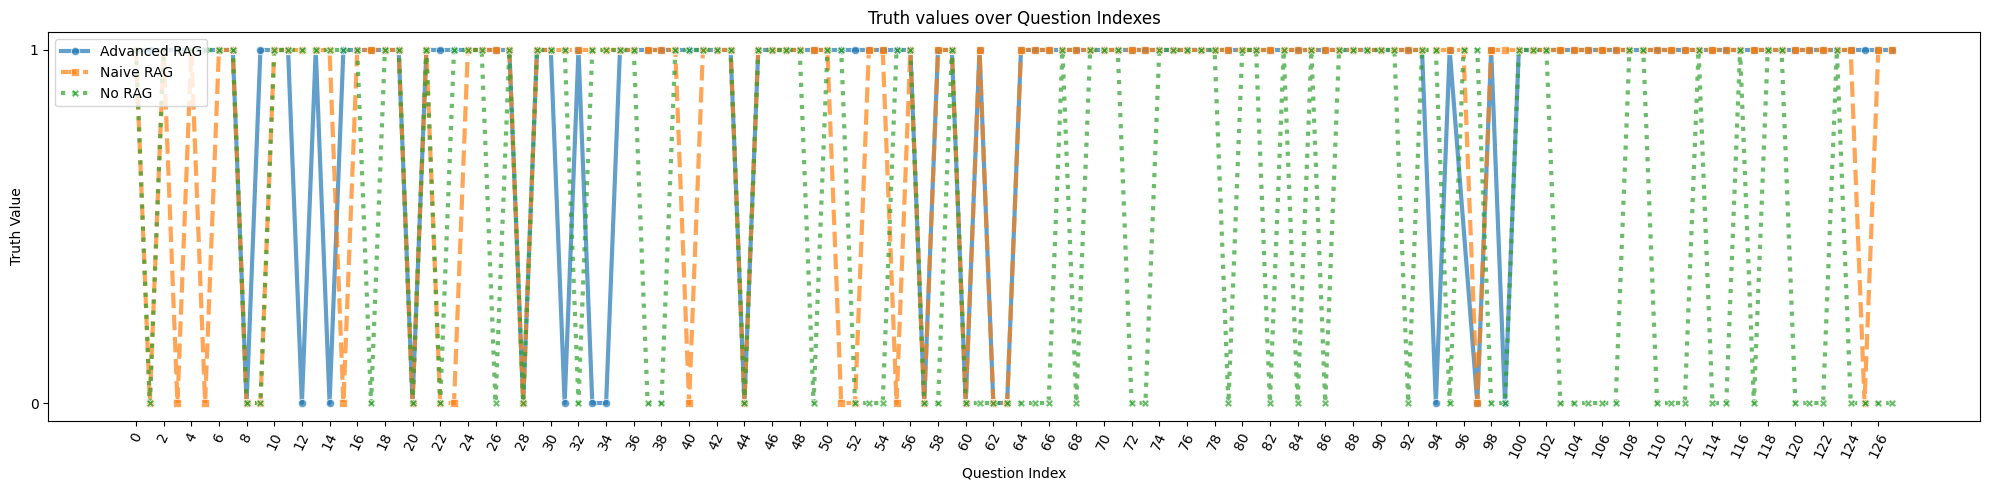

In [4]:
plt.figure(figsize=(20,5))
plt.title('Truth values over Question Indexes')
colors = sns.color_palette("tab10")
fig = sns.lineplot(data=adv_rag, x=adv_rag.index, y='truth',marker='o', linestyle='-',color=colors[0],label='Advanced RAG',alpha=0.7,linewidth=3)
fig.set_xticks(range(0,127,2))
fig.set_yticks([0,1])

fig1 = sns.lineplot(data=naive_rag, x=naive_rag.index, y='truth',marker='s', linestyle='--',color=colors[1],label='Naive RAG',alpha=0.7,linewidth=3)


fig2 = sns.lineplot(data=no_rag, x=adv_rag.index, y='truth',marker='X', linestyle=':',color=colors[2],label='No RAG',alpha=0.7,linewidth=3)


plt.legend(loc='upper left')
plt.xticks(rotation=65)
plt.xlabel('Question Index')
plt.ylabel('Truth Value')
plt.tight_layout()
plt.show()

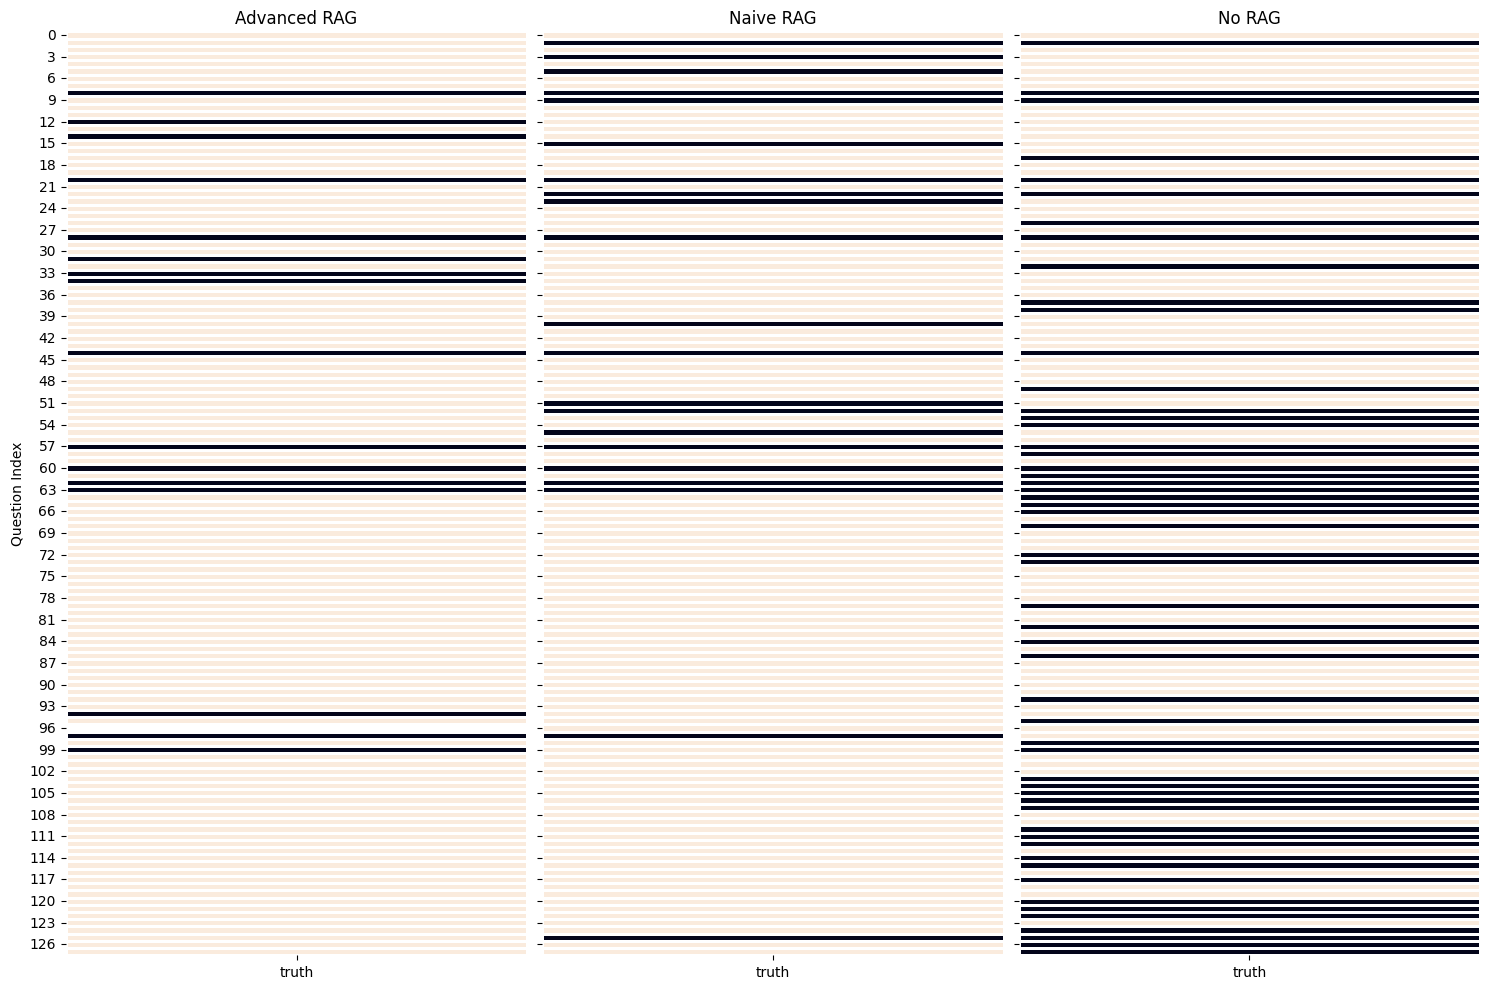

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 10), sharey=True)

sns.heatmap(data=adv_rag[['truth']], cbar=False, linewidths=1, ax=axes[0])
axes[0].set_title('Advanced RAG')
axes[0].set_ylabel('Question Index')

sns.heatmap(data=naive_rag[['truth']], cbar=False, linewidths=1, ax=axes[1])
axes[1].set_title('Naive RAG')

sns.heatmap(data=no_rag[['truth']], cbar=False, linewidths=1, ax=axes[2])
axes[2].set_title('No RAG')

plt.tight_layout()
plt.show()


In [6]:
def accuracy_score(df):
    return (len(df[df['truth']==1])/128)*100

In [26]:
df_acc= pd.DataFrame(columns=['method','accuracy'])
df_acc.loc[0] = ['Advanced RAG',accuracy_score(adv_rag)]
df_acc.loc[1] = ['Naive RAG',accuracy_score(naive_rag)]
df_acc.loc[2] = ['Llama3 8B',accuracy_score(no_rag)]
df_acc.loc[4] = ['GPT 4o mini', accuracy_score(gpt)]
df_acc.loc[5] = ['Mixtral 7x8B', accuracy_score(mixtral)]
df_acc.loc[3] = ['Gemma2 9B Instruct', accuracy_score(gemma)]

In [27]:
df_acc

,method,accuracy
0,Advanced RAG,86.71875
1,Naive RAG,83.59375
2,Llama3 8B,57.81250
4,GPT 4o mini,62.50000
5,Mixtral 7x8B,60.93750
3,Gemma2 9B Instruct,53.90625


C:\Users\Marcus Ong\AppData\Local\Temp\ipykernel_12456\449040133.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.barplot(data=df_acc.sort_values(by='accuracy',ascending=False),x='method',y='accuracy',palette='inferno')


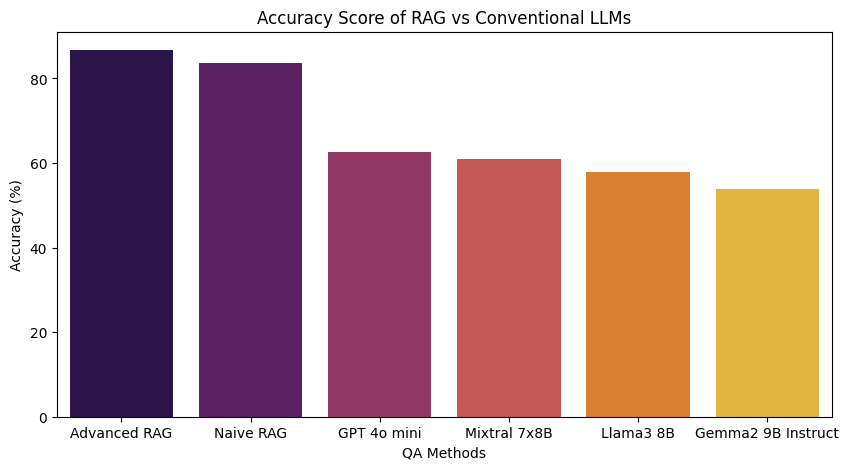

In [9]:
plt.figure(figsize=(10,5))
plt.title('Accuracy Score of RAG vs Conventional LLMs')
fig = sns.barplot(data=df_acc.sort_values(by='accuracy',ascending=False),x='method',y='accuracy',palette='inferno')
plt.ylabel('Accuracy (%)')
plt.xlabel('QA Methods')
plt.show()

In [10]:
df_token = pd.read_csv('../../data/Metrics/token_eval.csv')

In [28]:
df_token

,Unnamed: 0,method,precision,recall,f1_score,accuracy
0,0,Advanced RAG,0.386,0.696,0.442,0.867
1,1,Naive RAG,0.359,0.692,0.416,0.836
2,2,No RAG,0.239,0.396,0.266,0.578
3,3,Gemma2-9B-it,0.232,0.387,0.257,0.625
4,4,GPT4o-mini,0.130,0.438,0.182,0.609
5,5,mixtral-8x7b,0.077,0.442,0.117,0.539


In [12]:
df_token_melt = df_token.melt(id_vars=['method'], value_vars=['precision', 'recall', 'f1_score'], 
                    var_name='metric', value_name='score')

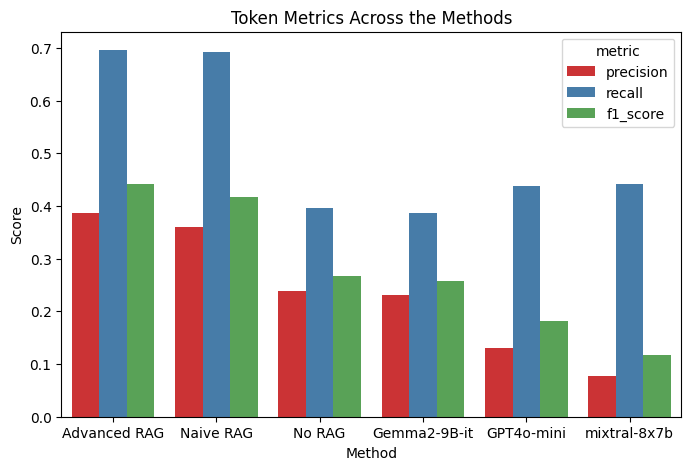

In [13]:
plt.figure(figsize=(8,5))
plt.title('Token Metrics Across the Methods')
sns.barplot(data=df_token_melt,x='method',y='score',hue='metric', palette='Set1')
plt.xlabel('Method')
plt.ylabel('Score')
plt.show()

In [14]:
import plotly.graph_objects as go

In [15]:
fig = go.Figure()



fig.add_trace(go.Scatterpolar(
    r=df_token[df_token['method']=="Naive RAG"][['precision','recall','f1_score']].values[0],
    theta=['precision','recall','f1_score'],
    fill='toself',
    name='Naive RAG',
    line_color='blue',
    opacity=0.8
))
fig.add_trace(go.Scatterpolar(
    r=df_token[df_token['method']=="Advanced RAG"][['precision','recall','f1_score']].values[0],
    theta=['precision','recall','f1_score'],
    fill='toself',
    name='Advanced RAG',
    line_color='purple',
    opacity=0.5
))

fig.add_trace(go.Scatterpolar(
    r=df_token[df_token['method']=="No RAG"][['precision','recall','f1_score']].values[0],
    theta=['precision','recall','f1_score'],
    fill='toself',
    name='No RAG',
    line_color='red',
    opacity=0.8
))

fig.add_trace(go.Scatterpolar(
    r=df_token[df_token['method']=="GPT4o-mini"][['precision','recall','f1_score']].values[0],
    theta=['precision','recall','f1_score'],
    fill='toself',
    name='GPT4o-mini',
    line_color='green',
    opacity=0.8
))

fig.add_trace(go.Scatterpolar(
    r=df_token[df_token['method']=="mixtral-8x7b"][['precision','recall','f1_score']].values[0],
    theta=['precision','recall','f1_score'],
    fill='toself',
    name='Mixtral 8x7B',
    line_color='orange',
    opacity=0.8
))

fig.add_trace(go.Scatterpolar(
    r=df_token[df_token['method']=="Gemma2-9B-it"][['precision','recall','f1_score']].values[0],
    theta=['precision','recall','f1_score'],
    fill='toself',
    name='Gemma2-9B-it',
    line_color='brown',
    opacity=0.8
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]  
        )),
    title="Comparison of Precision, Recall, and F1 Score)",
    showlegend=True,
    width=700, 
    height=700,
    template='seaborn'
)

# Show the plot
fig.show()

In [29]:
df_token['accuracy'] = df_acc['accuracy']/100

In [30]:
df_token = df_token.round(3)

In [32]:
df_token

,Unnamed: 0,method,precision,recall,f1_score,accuracy
0,0,Advanced RAG,0.386,0.696,0.442,0.867
1,1,Naive RAG,0.359,0.692,0.416,0.836
2,2,No RAG,0.239,0.396,0.266,0.578
3,3,Gemma2-9B-it,0.232,0.387,0.257,0.539
4,4,GPT4o-mini,0.130,0.438,0.182,0.625
5,5,mixtral-8x7b,0.077,0.442,0.117,0.609


C:\Users\Marcus Ong\AppData\Local\Temp\ipykernel_12456\2089736165.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




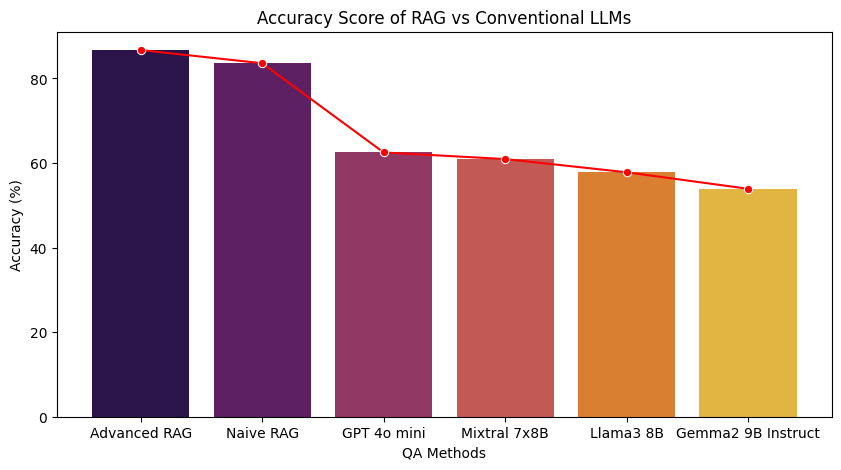

In [49]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(data=df_acc.sort_values(by='accuracy', ascending=False), x='method', y='accuracy', palette='inferno', ax=ax)
ax.set_ylabel('Accuracy (%)')
ax.set_xlabel('QA Methods')
ax.set_title('Accuracy Score of RAG vs Conventional LLMs')

sns.lineplot(data=df_acc.sort_values(by='accuracy', ascending=False), x='method', y='accuracy', marker='o', color='red', ax=ax)

plt.show()
